In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
img_path = '../output_videos/cropped_img.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

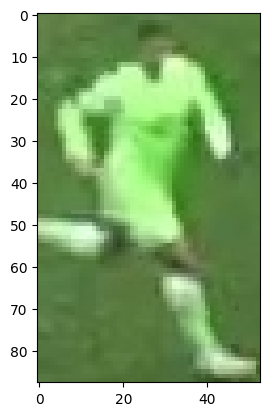

In [3]:
plt.imshow(img)
plt.show()

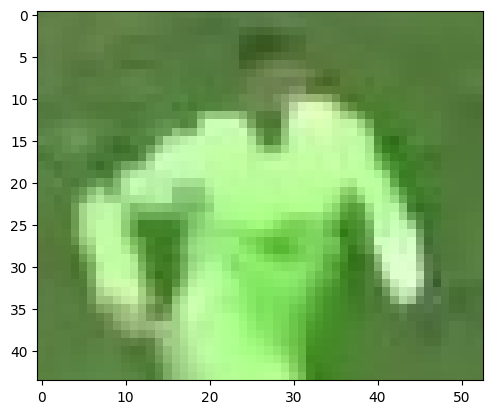

In [4]:
# Take the top half of the image
top_half = img[0:int(img.shape[0]/2),:]
plt.imshow(top_half)
plt.show()

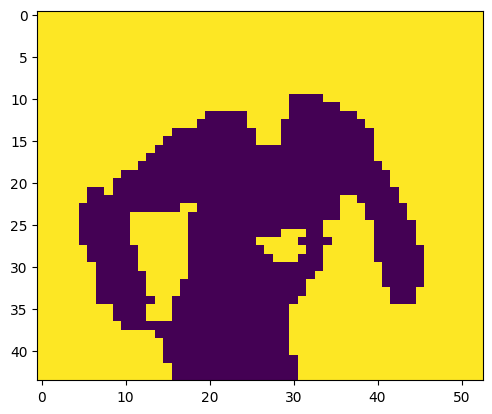

In [8]:
# Cluster the image into tshirt and background

img_2d = top_half.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(img_2d)

labels = kmeans.labels_
clustered_img = labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(clustered_img)
plt.show()

In [10]:
corner_clusters = [clustered_img[0,0], clustered_img[0,-1], clustered_img[-1,0], clustered_img[-1,-1]]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
non_player_cluster

1

In [11]:
player_cluster = 1-non_player_cluster
player_cluster

0

In [12]:
kmeans.cluster_centers_[player_cluster]

array([170.87105263, 235.43026316, 142.48552632])